## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


warnings.filterwarnings('ignore')

## Load data & Data Understanding

In [3]:
df = pd.read_csv('new_train.csv')

print(f'Data has {df.shape[0]} rows and {df.shape[1]} columns')
print('\nData Sample:')
display(df.sample(3))

missing = df.isna().sum().sum()
print('\nMissing Values:', missing)

Data has 32950 rows and 16 columns

Data Sample:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
5833,30,technician,single,professional.course,no,no,no,telephone,may,tue,70,3,999,0,nonexistent,no
28982,49,blue-collar,married,basic.4y,unknown,no,no,cellular,aug,thu,503,1,999,0,nonexistent,no
20004,34,technician,single,university.degree,no,no,no,cellular,may,tue,61,4,999,0,nonexistent,no



Missing Values: 0


In [149]:
# change the target column name from y to term_deposit
df['term_deposit'] = df['y']
df.drop('y', axis=1, inplace=True)

The data contains 32950 rows and 16 columns, and the data don't have any missing values. The data contains the following columns:
| Column Name | Description |
|-------------|-------------|
| age         | Age of the client |
| job         | Type of job |
| marital     | Marital status |
| education   | Last client level of education |
| default     | Has credit in default? |
| housing     | Has a housing loan? |
| loan        | Has a personal loan? |
| contact     | Contact communication type |
| month       | Last contact month of year |
| day_of_week | Last contact day of the week |
| duration    | Last contact duration, in seconds |
| campaign    | Number of contacts performed during this campaign and for this client |
| pdays       | Number of days that passed by after the client was last contacted from a previous campaign |
| previous    | Number of contacts performed before this campaign and for this client |
| poutcome    | Outcome of the previous marketing campaign |
| term_deposit           | Has the client subscribed a term deposit? |

## Exploratory Data Analysis

### Stastical Summary
now we want to see the statistical summary of numerical data and categorical data

#### Numerical Data

In [52]:
numeric = df.select_dtypes(exclude='object')
print('Numerical summary:')
display(numeric.describe())

Numerical summary:


,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Summary findings from statistical summary of numerical data:
- **Age**:  The average age of the clients is 40 years old while the median age is 38, wich is slightly less than the mean, indicating a slight skew to the right, and with a minimum age of 17 and a maximum age of 98.

- **Duration**: The average duration of the last contact is 258 seconds while the median duration is 180 seconds, indicating a slight skew to the right, and with a minimum duration of 0 seconds and a maximum duration of 4918 seconds.

- **Campaign**: The average number of contacts performed during this campaign for a client is 2.56 while the median is 2, wich is slightly less than the mean, indicating a slight skew to the right, and with a minimum number of contacts is 1 and the maximum is 56.

- **Pdays**: The average number of days that passed by after the client was last contacted from a previous campaign is approximately 962.05 while the median is 999, indicating a slight skew to the left, and with a minimum number of days is 0 and the maximum is 999.

- **Previous**: The minimum number of contacts is 0 and the maximum is 7, and this column has 8 unique values, indicating that the column supposed to be a categorical column, so i will change this column to a categorical column to see the summary of this column.

#### Categorical Data

In [44]:
df['prevoius'] = df['previous'].astype('object')
categoric = df.select_dtypes(include='object')
print('Categorical summary:') 
display(categoric.describe())

Categorical summary:


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,term_deposit,prevoius
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2,8
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no,0
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238,28416


Summary findings from statistical summary of categorical data:
- **Job**: The most common job is admin with 8314 clients, this column has 12 unique values.
- **Marital**: The most common marital status is married with 19923 clients, this column has 4 unique values.
- **Education**: The most common education level is university degree with 9736 clients, this column has 8 unique values.
- **Default**: The most common value is no with 26007 clients, this column has 2 unique values.
- **Housing**: The most common value is yes with 17254 clients, this column has 2 unique values.
- **Loan**: The most common value is no with 27131 clients, this column has 2 unique values.
- **Contact**: The most common contact communication type is cellular with 20908 clients, this column has 2 unique values.
- **Month**: The most common month is may with 11011 clients, this column has 10 unique values.
- **Day_of_week**: The most common day of the week is thu with 6857 clients, this column has 5 unique values.
- **Poutcome**: The most common outcome of the previous marketing campaign is nonexistent with 28416 clients, this column has 3 unique values.
- **Y**: The most common value is no with 29238 clients, this column has 2 unique values.
- **Previous**: The most common value is 0 with 28416 clients not previously contacted, this column has 8 unique values. The modus value of this column is pretty high (86%) compared to the other values.

### Brief Data Visualization

#### Numerical Data

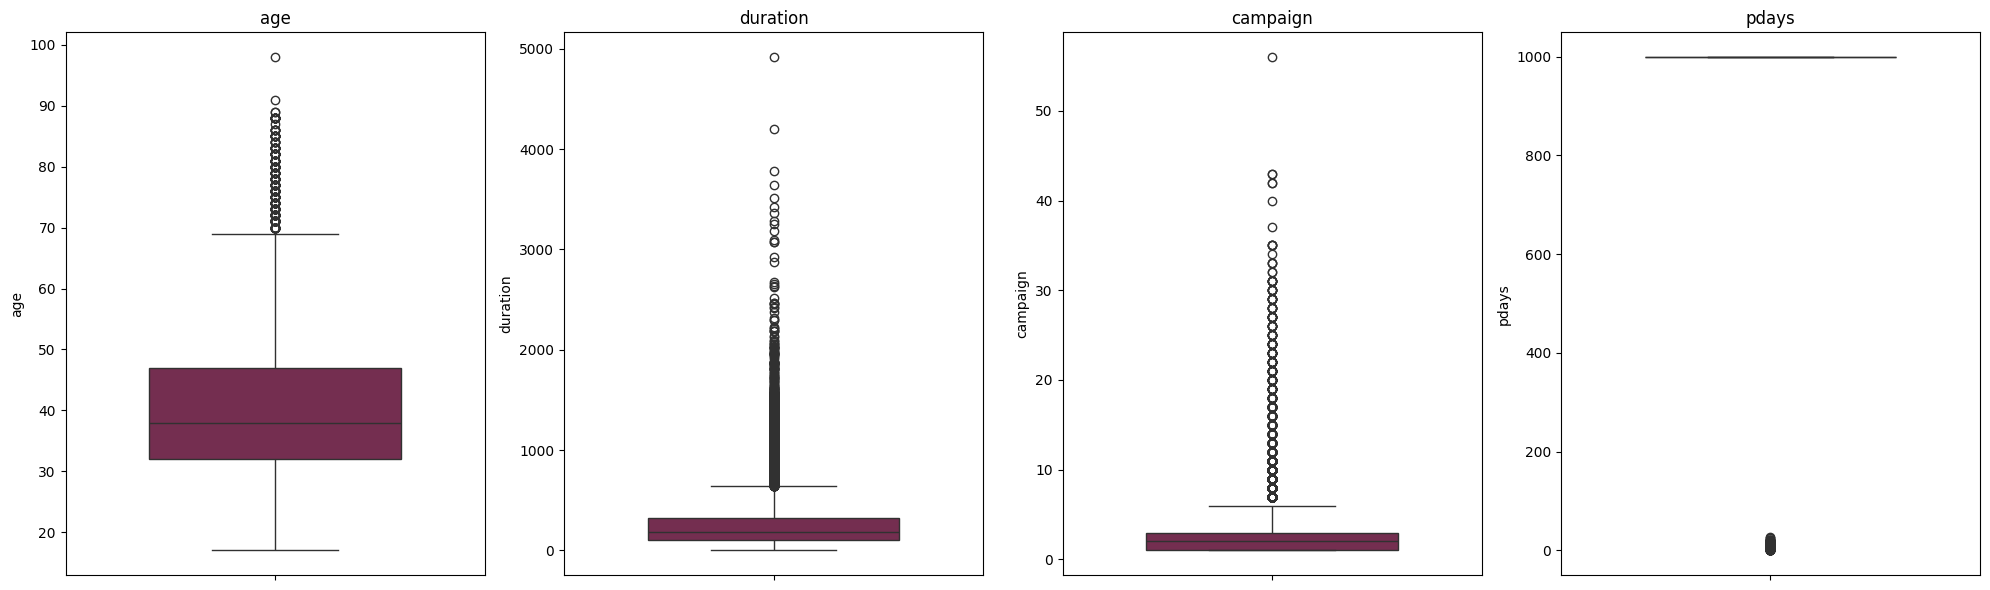

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
# axes = axes.flatten()
numerics = numeric.drop(columns='previous')

for i, column in enumerate(numerics.columns):
    sns.boxplot(df[column], ax=axes[i], color='#7f2350', orient='v', width=0.6)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

The numerical data contains outliers, i will use the IQR method to detect and cap the outliers to the upper and lower bounds. 

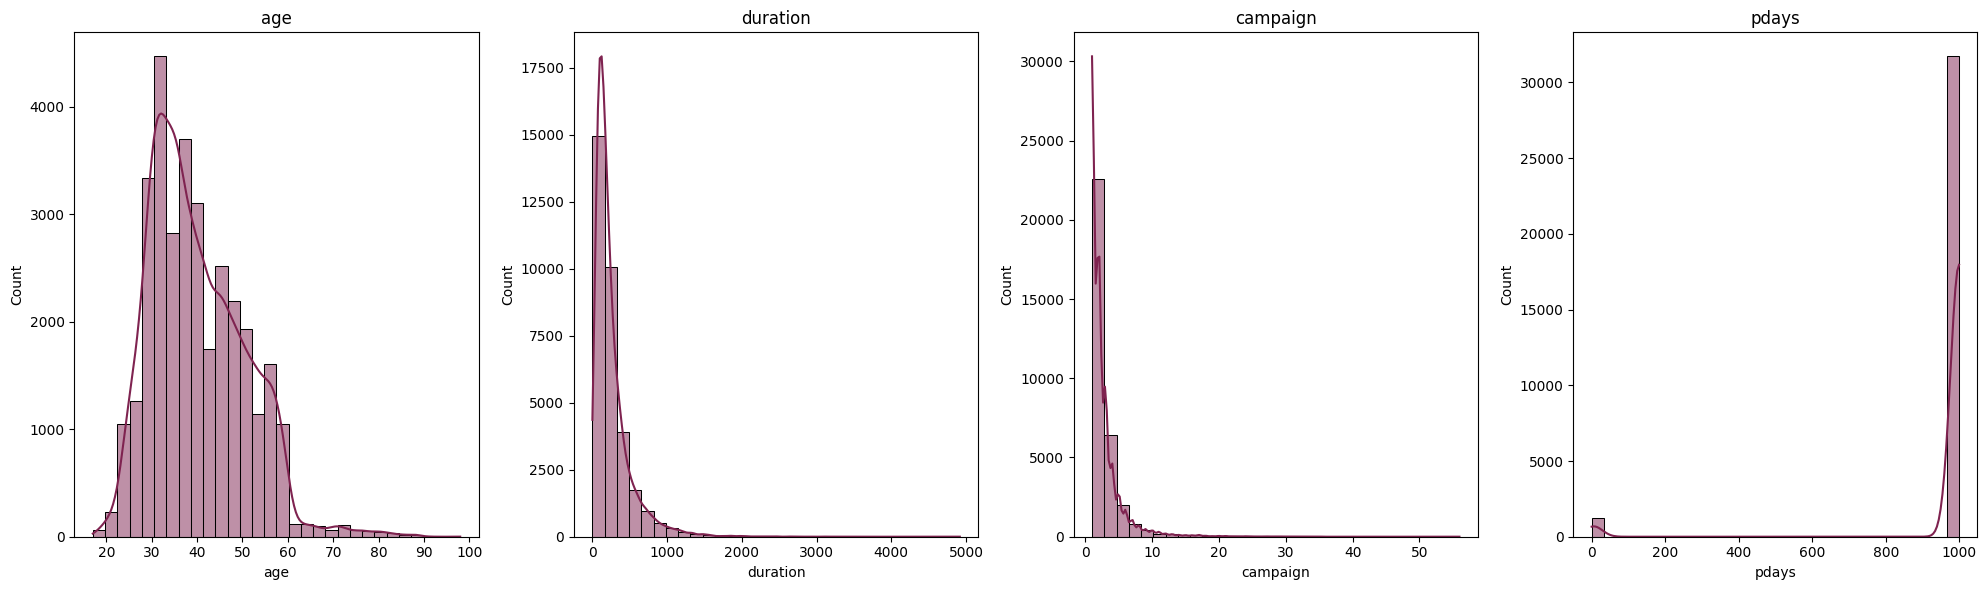

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, column in enumerate(numerics.columns):
    sns.histplot(df[column], ax=axes[i], color='#7f2350', kde=True, bins=30)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

3 of the numerical data(`age`, `duration`, `campaign`) positively skewed, i will normalize the data later in the preprocessing step. for pdays column the values are mostlly 999, thats why the distribution is pretty weird. 

#### Categorical Data

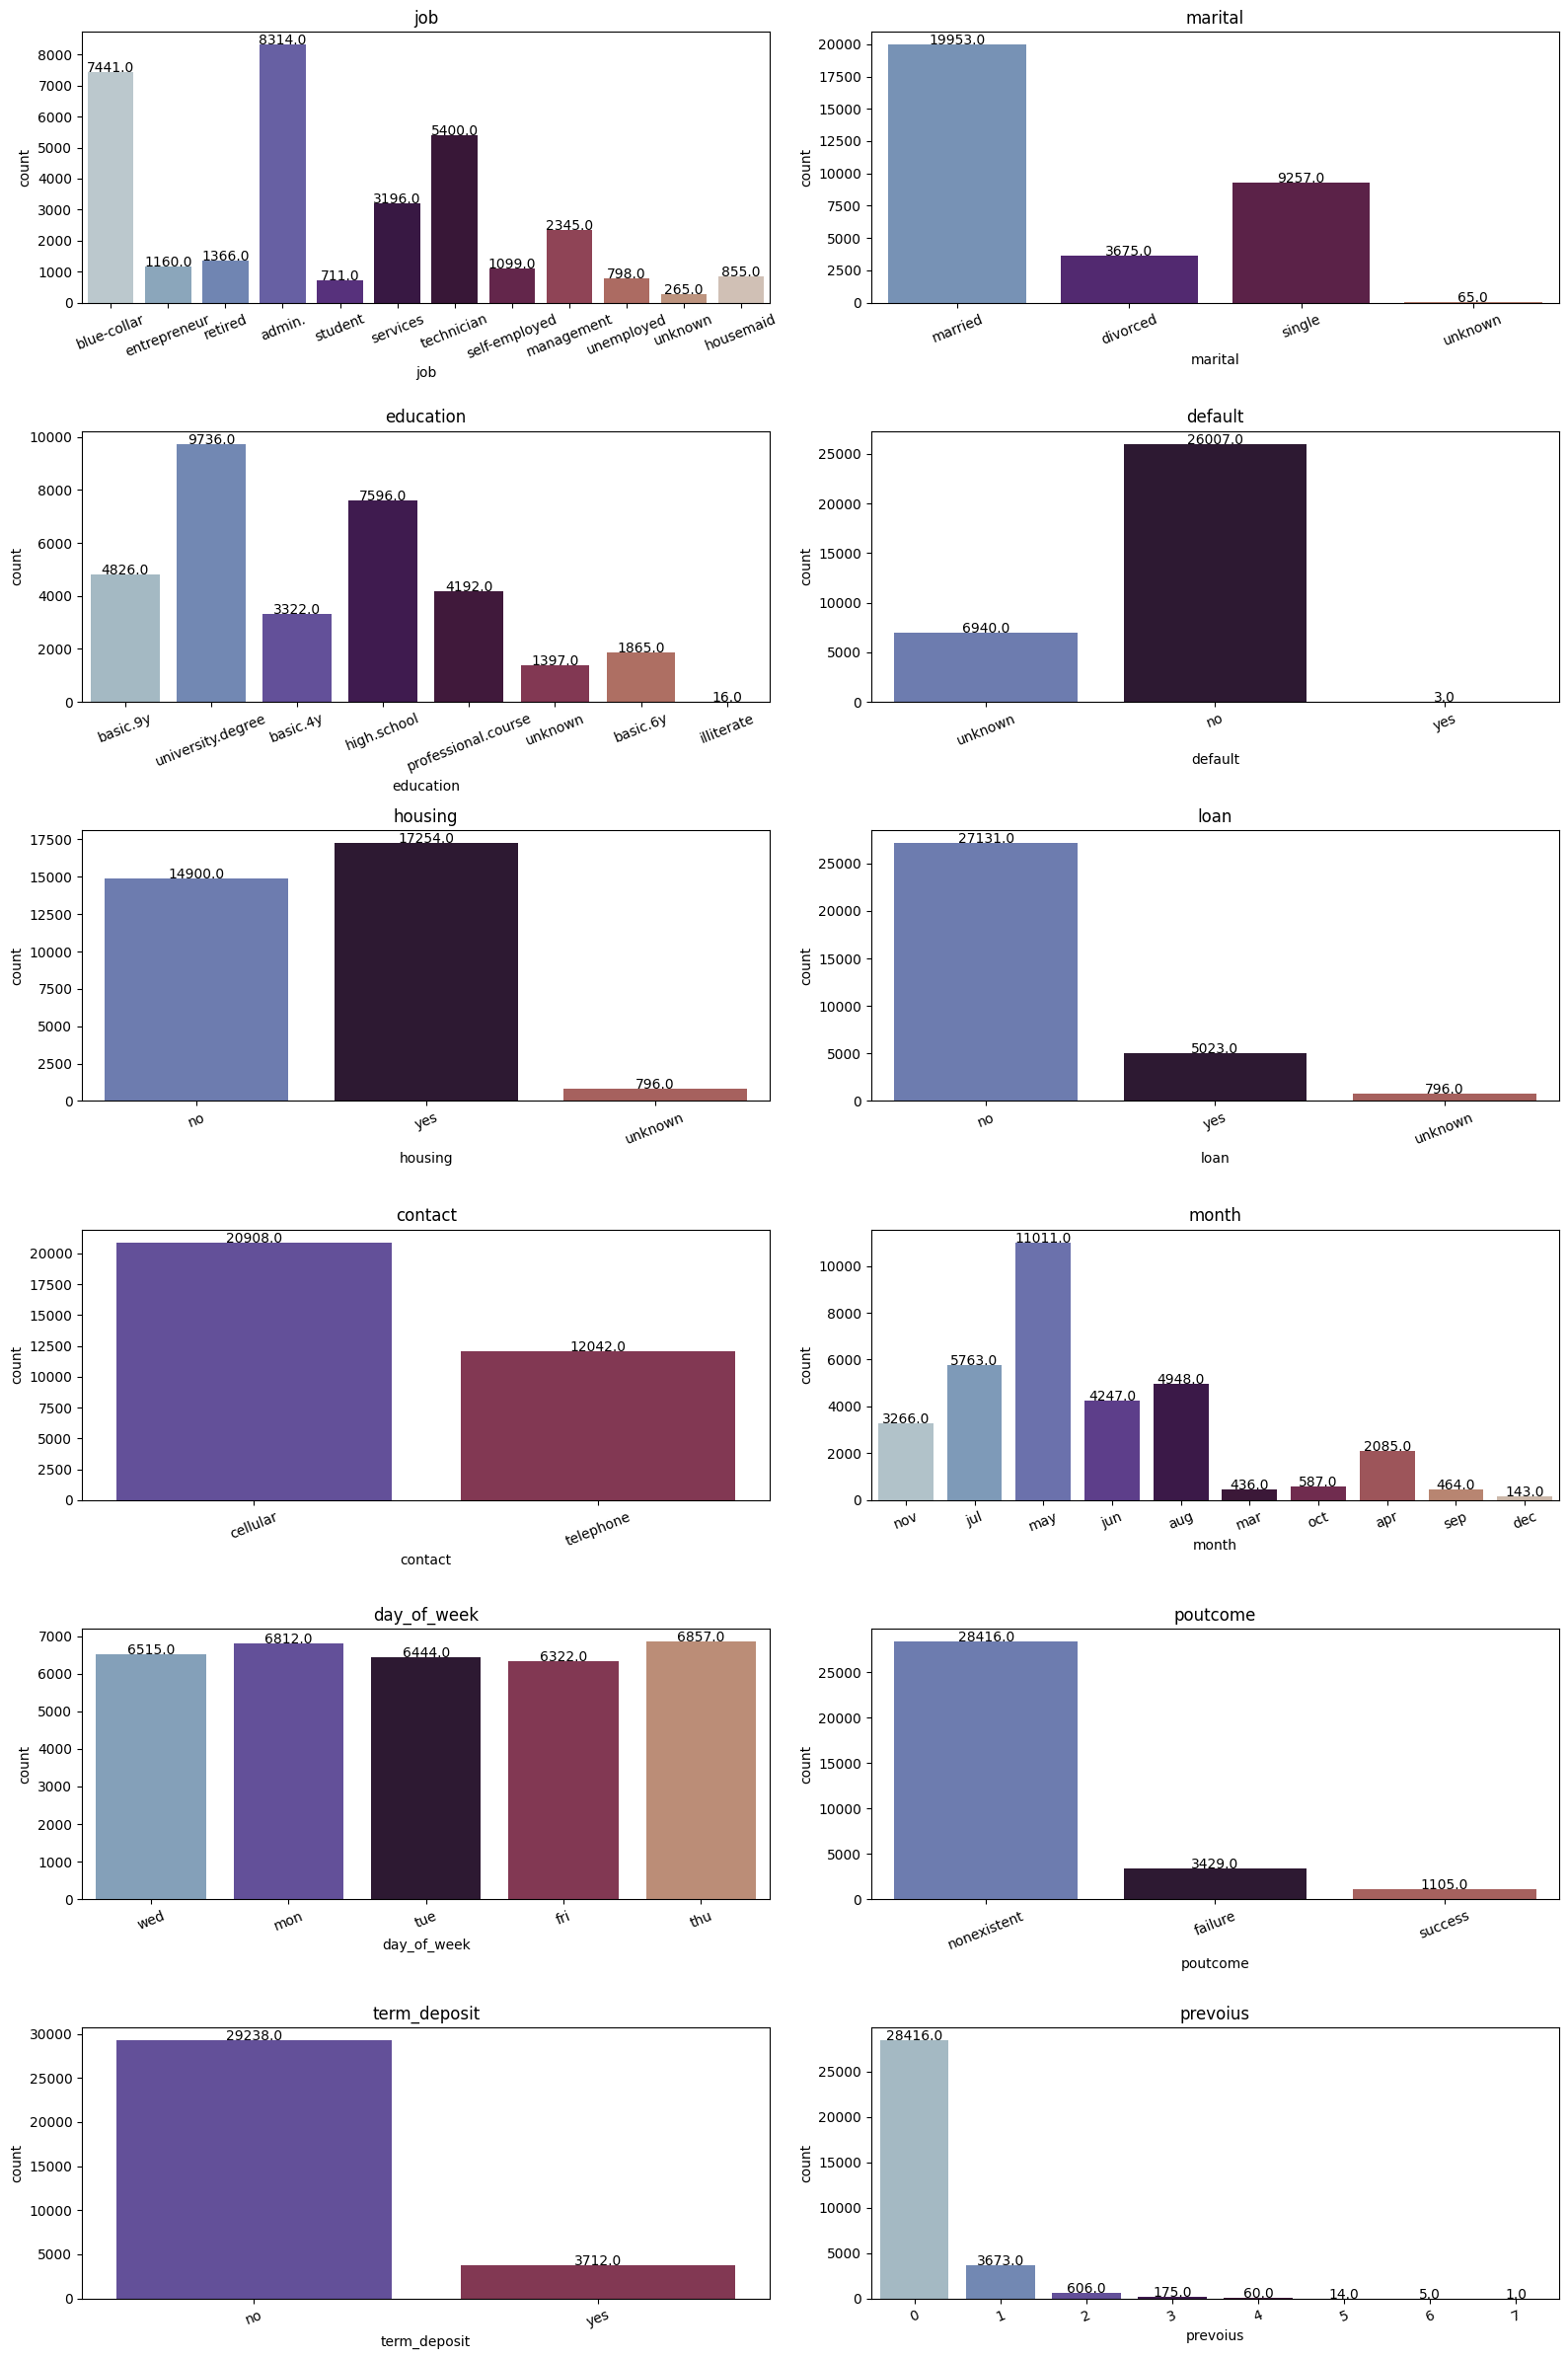

In [28]:
# Create for loop to plot countplot for each categorical column
fig, axes = plt.subplots(6, 2, figsize=(16, 24))

for i, column in enumerate(categoric.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=df[column], ax=ax, palette='twilight')
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=22)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height,
            '{}'.format(height), ha='center')

plt.tight_layout()
plt.show()

as said before on the statistical analysis, there's some of the values of the column are pretty high compared to the other values, and also there's some unknown value in the data, for example the `default` column has value no, yes, and unknown, the no value is dominating, yes value is too small, and the unknown value is medium, because i think this is less informative i will drop this column later in the preprocessing step.

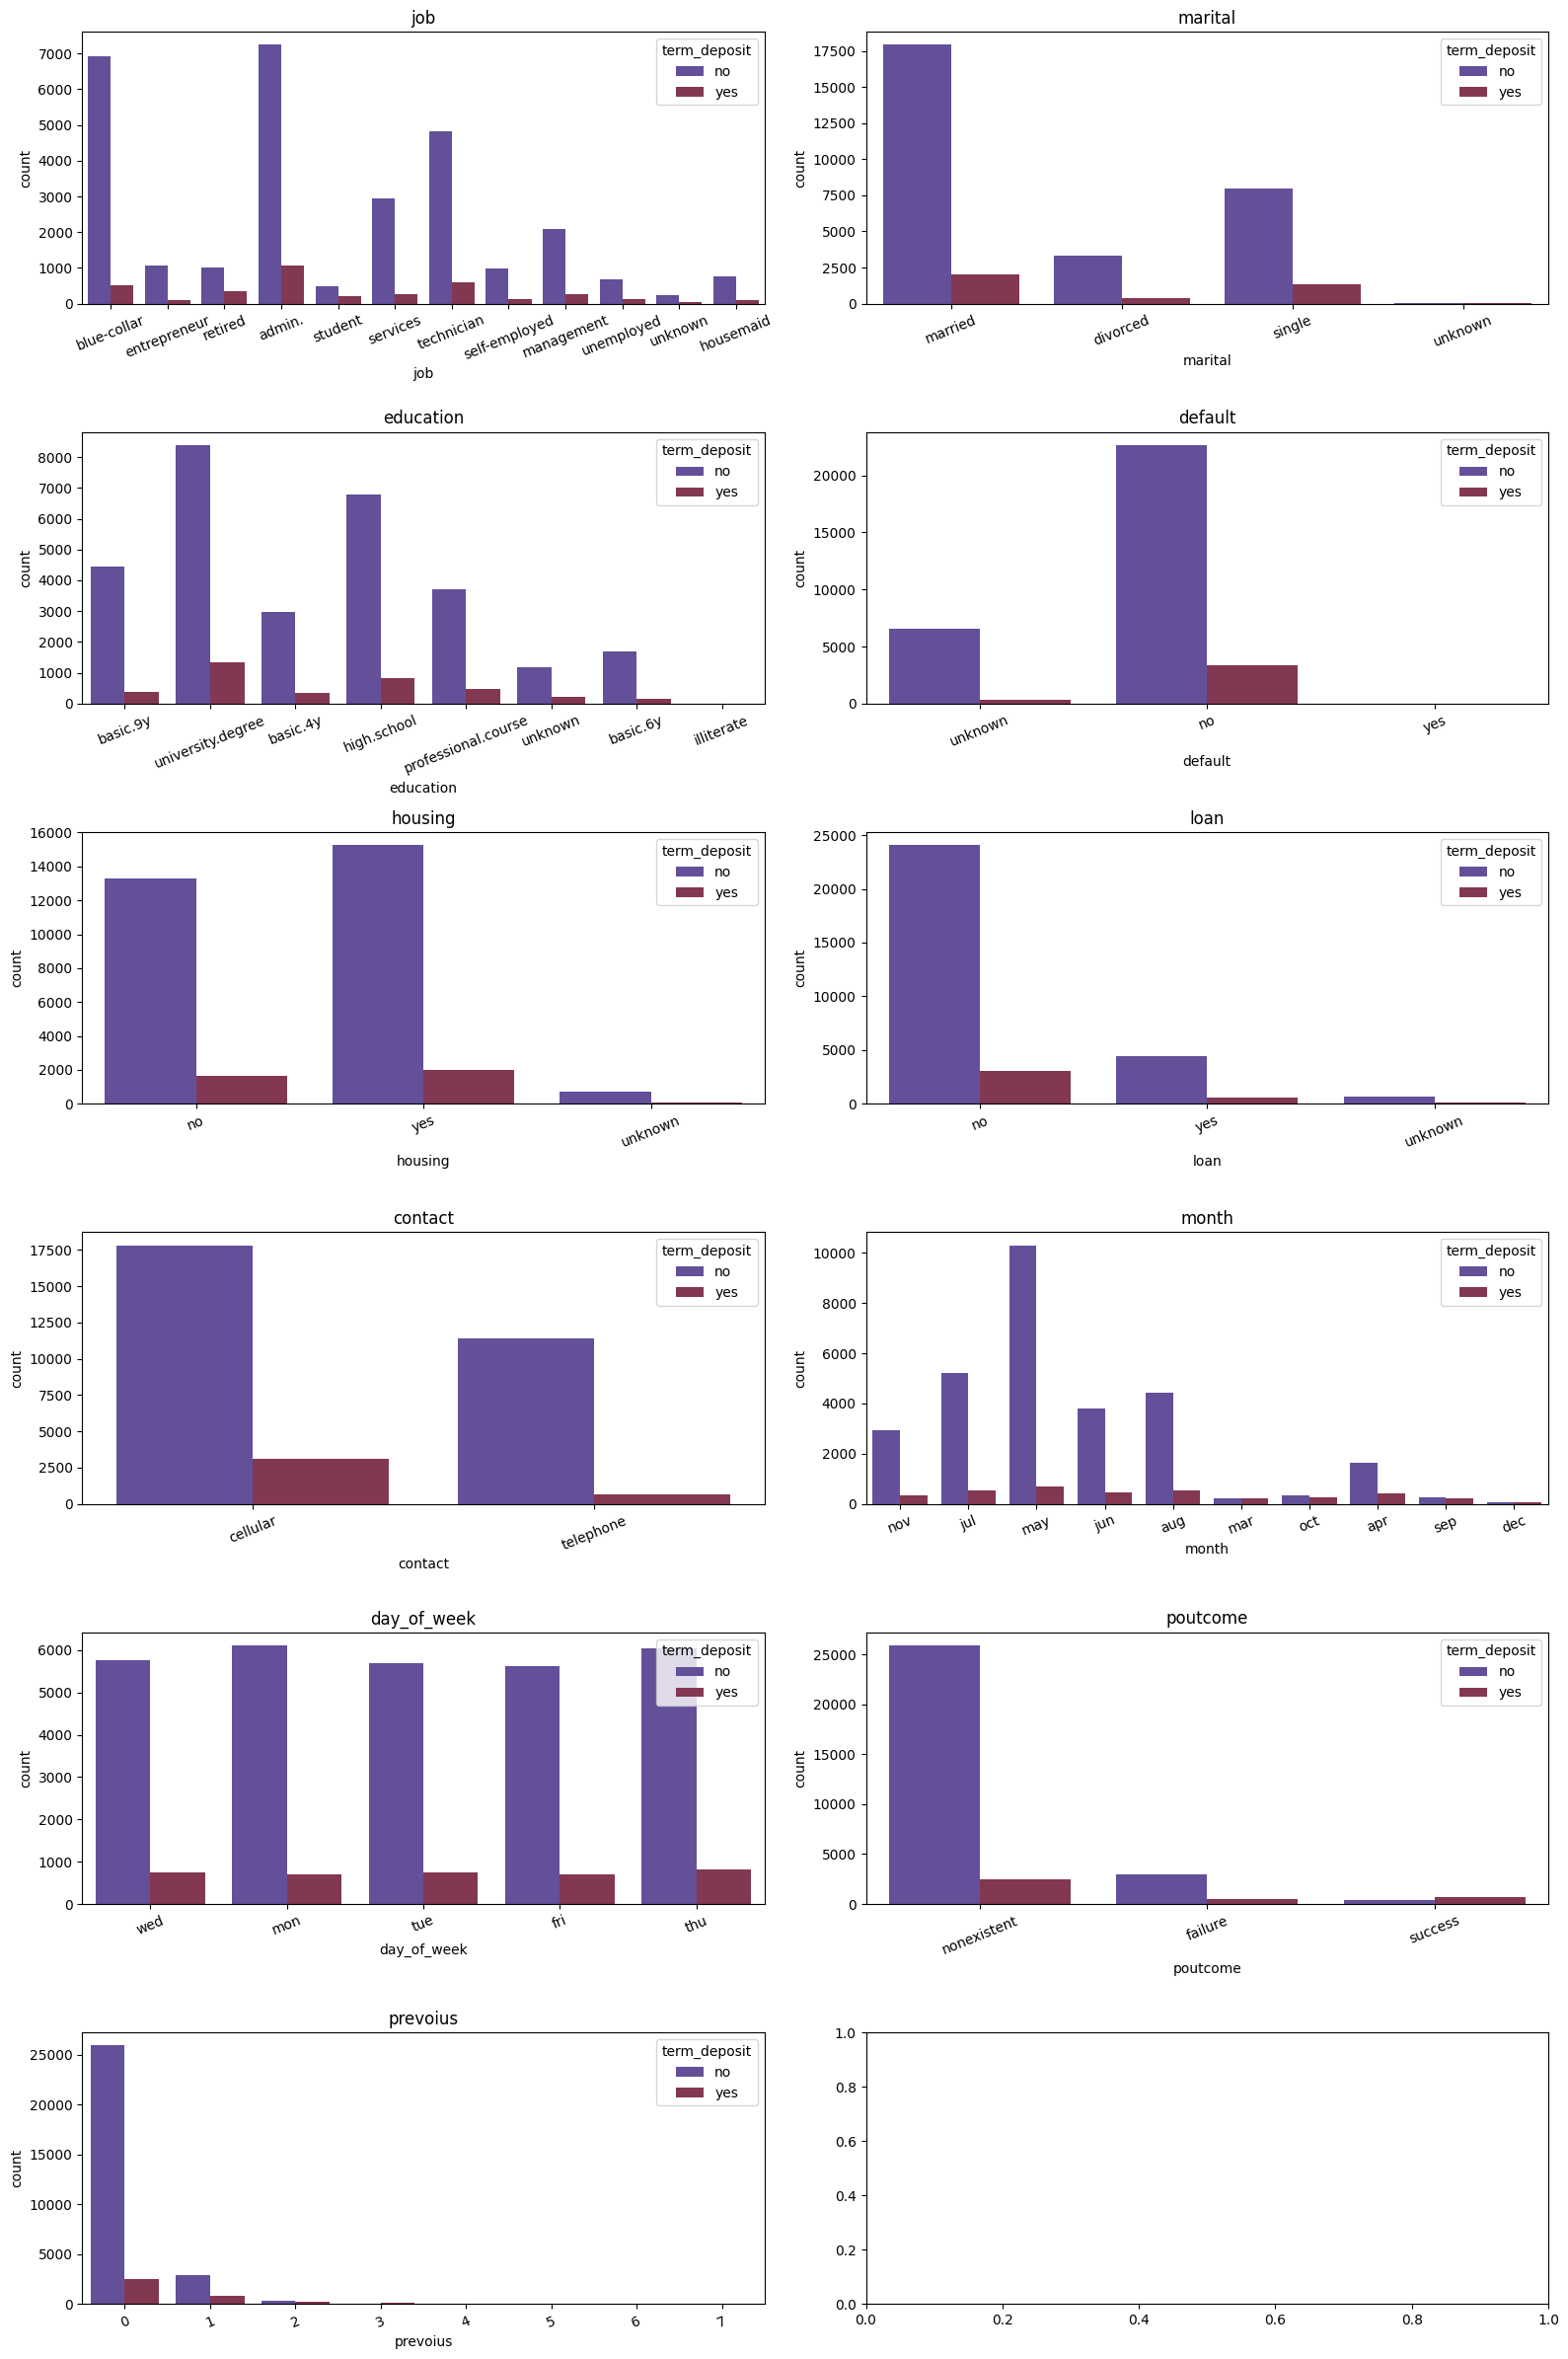

In [29]:
# Create for loop to plot countplot for each categorical column
fig, axes = plt.subplots(6, 2, figsize=(16, 24))

categorics = categoric.drop(columns='term_deposit')
for i, column in enumerate(categorics.columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=df[column], ax=axes[row, col], data=df, palette='twilight', hue='term_deposit')
    axes[row, col].set_title(column)
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=22)

plt.tight_layout()
plt.show()

### Data Preprocessing

#### Feature Creation

In [6]:
df = pd.read_csv('new_train.csv')
# change the target column name from y to term_deposit
df['term_deposit'] = df['y']
df.drop('y', axis=1, inplace=True)

In [7]:
df['recently_contacted'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
df.drop('pdays', axis=1, inplace=True)

df['previously_contacted'] = df['previous'].apply(lambda x: 'contacted' if x > 0 else 'not contacted')
df.drop('previous', axis=1, inplace=True)

In [8]:
# Mapping job titles to broader categories
mapjob = {
    'student': 'unemployed',  
    'retired': 'unemployed',  
    'unknown': 'unemployed',  
    'entrepreneur': 'self-employed',  
    'housemaid': 'services', 
}

# Replace the job titles in the training and test datasets
df['job'] = df['job'].replace(mapjob)

# Mapping education levels to broader categories
mapedu = {
    'basic.9y': 'basic education',  
    'basic.6y': 'basic education',  
    'basic.4y': 'basic education', 
    'unknown': 'other',  
    'illiterate': 'other'  
}

# Replace the education levels in the training and test datasets
df['education'] = df['education'].replace(mapedu)
df['education'] = df['education'].replace(mapedu)

# Columns where 'unknown' values are to be removed
unknown_col = ['marital', 'housing', 'loan']

# Loop through the columns and remove rows with 'unknown' values
for col in unknown_col:
    df = df[df[col] != 'unknown']
    
# Drop the 'default' column from the training and test datasets
df = df.drop(columns='default', axis=1)

#### Train Test Split

In [9]:
X = df.drop(columns='term_deposit', axis=1)
y = df['term_deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1103)

print(f'Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns')

Training set has 24067 rows and 14 columns
Test set has 8023 rows and 14 columns


#### Handling Outlier

In [10]:
numerics = X_train.select_dtypes('number')
numerics = numerics[['age', 'duration', 'campaign']]

In [11]:
# Define a function to handle outliers in a DataFrame using the capping method
def cap_outliers(data, cols):
    """
    This function caps the outliers in the specified columns of a DataFrame.
    
    Parameters:
    data (DataFrame): The DataFrame to process.
    cols (list): A list of column names to cap outliers in.
    
    Returns:
    DataFrame: The processed DataFrame with outliers capped.
    """
    # Loop over each specified column
    for col in cols:
        # Calculate the first quartile (Q1)
        Q1 = data[col].quantile(0.25)
        # Calculate the third quartile (Q3)
        Q3 = data[col].quantile(0.75)
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Calculate the lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        # Calculate the upper bound for outliers
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers in the column by replacing them with the lower or upper bound
        data[col] = data[col].clip(lower_bound, upper_bound)
    
    # Return the processed DataFrame
    return data

# Apply the cap_outliers function to the DataFrame 'df', capping outliers in all numeric columns
X_capped = cap_outliers(X_train, numerics.columns)

#### Feature Engineering

##### Binning Categorical data

In [180]:
# # Mapping job titles to broader categories
# mapjob = {
#     'student': 'unemployed',  
#     'retired': 'unemployed',  
#     'unknown': 'unemployed',  
#     'entrepreneur': 'self-employed',  
#     'housemaid': 'services', 
# }

# # Replace the job titles in the training and test datasets
# X_capped['job'] = X_capped['job'].replace(mapjob)
# X_test['job'] = X_test['job'].replace(mapjob)

# # Mapping education levels to broader categories
# mapedu = {
#     'basic.9y': 'basic education',  
#     'basic.6y': 'basic education',  
#     'basic.4y': 'basic education', 
#     'unknown': 'other',  
#     'illiterate': 'other'  
# }

# # Replace the education levels in the training and test datasets
# X_capped['education'] = X_capped['education'].replace(mapedu)
# X_test['education'] = X_test['education'].replace(mapedu)

# # Columns where 'unknown' values are to be removed
# unknown_col = ['marital', 'housing', 'loan']

# # Loop through the columns and remove rows with 'unknown' values
# for col in unknown_col:
#     X_capped = X_capped[X_capped[col] != 'unknown']
#     X_test = X_test[X_test[col] != 'unknown']

# # Drop the 'default' column from the training and test datasets
# Xtr_binned = X_capped.drop(columns='default', axis=1)
# Xts_binned = X_test.drop(columns='default', axis=1)

##### Feature Selection

In [107]:
# def chi_square_test(df, target, categorical_features):
#     """
#     This function performs a Chi-Square test of independence for each categorical feature 
#     in a DataFrame with respect to a categorical target.
    
#     Parameters:
#     df (DataFrame): The DataFrame to process.
#     target (str): The name of the target column.
#     categorical_features (list): A list of the names of the categorical feature columns.
    
#     Returns:
#     DataFrame: A DataFrame that contains the p-value of the Chi-Square test for each feature, 
#                sorted in ascending order.
#     """
#     # Create an empty DataFrame to store the results
#     results = pd.DataFrame(columns=['feature', 'p-value'])

#     # Perform the test for each categorical feature
#     for i, feature in enumerate(categorical_features):
#         # Create a contingency table
#         contingency_table = pd.crosstab(df[feature], df[target])

#         # Perform the Chi-Square test
#         _, p, _, _ = chi2_contingency(contingency_table)

#         # Add the results to the results DataFrame using loc
#         results.loc[i] = [feature, p]

#     # Return the results sorted by p-value
#     return results.sort_values('p-value')

# # Perform the Chi-Square test for the categorical features in the training set
# chisq_train = chi_square_test(Xtr_binned, y_train, Xcat)

# chisq_test = chi_square_test(Xts_binned, y_test, Xcat)

# display(chisq_train)
# display(chisq_test)

In [108]:
# # Set a significance level
# alpha = 0.05

# # Select the features where the p-value is less than the significance level
# selected_features = chi_square_results[chi_square_results['p-value'] < alpha]['feature']

# # Select these features from Xtr_binned
# Xtr_binned_selected = Xtr_binned[selected_features]

# Xts_binned_selected = Xts_binned[selected_features]

# Xtr_binned.drop(columns=Xtr_binned.select_dtypes(include='object').columns, axis=1, inplace=True)

# Xts_binned.drop(columns=Xts_binned.select_dtypes(include='object').columns, axis=1, inplace=True)

In [82]:
# Xtr_selected = pd.concat([Xtr_binned, Xtr_binned_selected], axis=1)

##### Encoding Categorical Data

In [12]:
X_capped.drop(columns=['month', 'day_of_week'], axis=1, inplace=True)
X_test.drop(columns=['month', 'day_of_week'], axis=1, inplace=True)

In [13]:
encode_edu = {
    'other': 0,
    'basic education': 1,
    'high.school': 2,
    'professional.course': 3,
    'university.degree': 4
}

X_capped['education'] = X_capped['education'].map(encode_edu)
X_test['education'] = X_test['education'].map(encode_edu)

Xtr_encoded = pd.get_dummies(X_capped, drop_first=True).astype('int64')
Xts_encoded = pd.get_dummies(X_test, drop_first=True).astype('int64')

# encode ytrain and ytest
y_train = y_train.map({'no': 0, 'yes': 1})

y_test = y_test.map({'no': 0, 'yes': 1})

##### Feature Scaling

In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
Xtr_scaled = scaler.fit_transform(Xtr_encoded)

Xtr_scaled = pd.DataFrame(Xtr_scaled, columns=Xtr_encoded.columns)

Xts_scaled = scaler.transform(Xts_encoded)

#### Handle Imbalance Data

In [204]:
print(Xtr_scaled.shape)
print(y_train.shape)

(24067, 19)
(24067,)


In [17]:
# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Fit the SMOTE instance to the data and resample the data
Xtr_resampled, ytr_resampled = smote.fit_resample(Xtr_scaled, y_train)

### Modelling

#### Define function to evaluate the model

In [18]:
def eval_model(model, X_train, y_train, X_test, y_test, thresshold):
    
    model.fit(X_train, y_train)

    pred_train = model.predict_proba(X_train)[:, 1]
    pred_test = model.predict_proba(X_test)[:, 1]

    # print auc score with roc auc score
    print('Train AUC:', roc_auc_score(y_train, pred_train))
    print('Test AUC:', roc_auc_score(y_test, pred_test))

    print('Train Recall:', recall_score(y_train, pred_train > thresshold))
    print('Test Recall:', recall_score(y_test, pred_test > thresshold))

    print('Train Precision:', precision_score(y_train, pred_train > thresshold))
    print('Test Precision:', precision_score(y_test, pred_test > thresshold))

In [19]:
# Create a Logistic Regression model
lr = LogisticRegression(random_state=1103)

# evaluate the model
eval_model(lr, Xtr_resampled, ytr_resampled, Xts_scaled, y_test, 0.5)

Train AUC: 0.8980873086926651
Test AUC: 0.8864071510674443
Train Recall: 0.8059974658594959
Test Recall: 0.7842907385697538
Train Precision: 0.8237805170511775
Test Precision: 0.36006458557588805


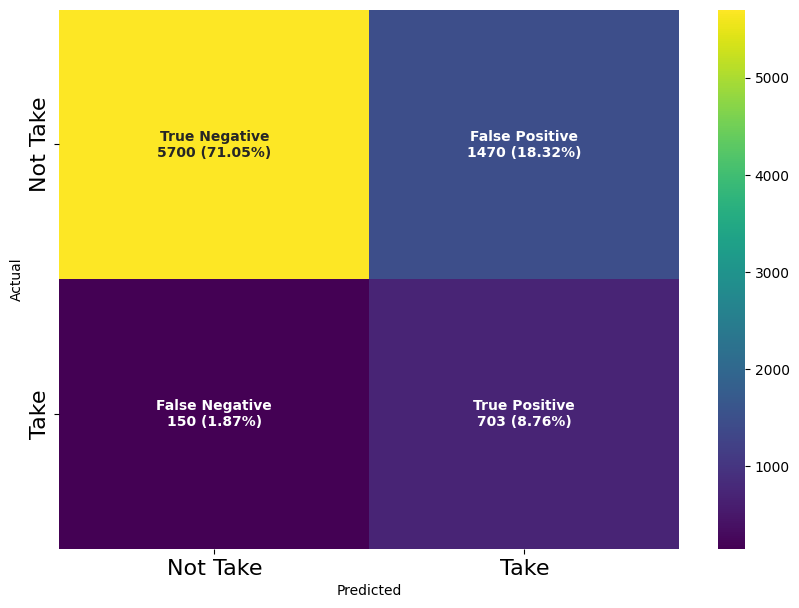

In [235]:
pred_test = lr.predict_proba(Xts_scaled)[:, 1]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_test > 0.42)

# Calculate the percentage of each category
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Define the labels
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Create labels with both count and percentage
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix using a heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('white')  # Change figure color

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})
# plt.title('Confusion Matrix LightGBM Model', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Change label colors
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.xticks(ticks=[0.5, 1.5], labels=['Not Take', 'Take'], fontsize=16)
plt.yticks(ticks=[0.5, 1.5], labels=['Not Take', 'Take'], fontsize=16)
plt.show()

#### Train and Evaluate Model

#### Model Selection

#### Tune Selected Model Hyperparameter for Enhance Model Performance

In [236]:
# logistic regression hyperparameter tuning

# Define the hyperparameters to search
hyperparameters = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': np.arange(100, 1000, 100),
}

# Create a RandomizedSearchCV object
lr_random_search = RandomizedSearchCV(lr, hyperparameters, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=1103)

# Fit the RandomizedSearchCV object to the data
lr_random_search.fit(Xtr_resampled, ytr_resampled)

# Get the best hyperparameters from the search
best_params = lr_random_search.best_params_
print(best_params)

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 0.0018329807108324356}


In [237]:
# Create a Logistic Regression model with the best hyperparameters
lr_best = LogisticRegression(**best_params, random_state=1103)

# evaluate the model
eval_model(lr_best, Xtr_resampled, ytr_resampled, Xts_scaled, y_test, 0.45)

Train AUC: 0.8983124110258269
Test AUC: 0.8873656190882617
Train Recall: 0.8500633535126003
Test Recall: 0.82063305978898
Train Precision: 0.8022143489813994
Test Precision: 0.3258845437616387


In [242]:
# Assume that 'model' is your fitted Logistic Regression model
feature_importance = lr_best.coef_[0]

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'feature': Xtr_resampled.columns, 'importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)


In [243]:
feature_importance_df

,feature,importance
2,duration,1.232274
4,recently_contacted,0.290190
10,job_unemployed,0.254911
12,marital_single,0.172028
17,poutcome_success,0.168718
1,education,0.159174
0,age,0.071328
11,marital_married,0.025124
13,housing_yes,0.020442
6,job_management,-0.020278
